<div style="color:white; background:black; text-align: center; font-size: 16px; padding: 1px;">
    <h2>IMBD Movies' Reviews Sentiment Analysis
    <h4><span style="color:blue;">Tensorflow</span></h4>
    <p style="position:absolute; bottom:8px; right:20px;">7 May</p>
</div>


# **Imports**

In [2]:
import pandas as pd
import numpy as np
import re
import time
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import LSTM
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import asarray, zeros
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, LSTM, GRU
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
import time
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.losses import binary_crossentropy
from keras.optimizers import Adam


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, Conv1D, GlobalMaxPooling1D, LSTM , Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

import warnings 

warnings.filterwarnings('ignore') 

# **Data Loading**

la dimension de imdb_df  : (50000, 2)
Les valeurs nulls  : False
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


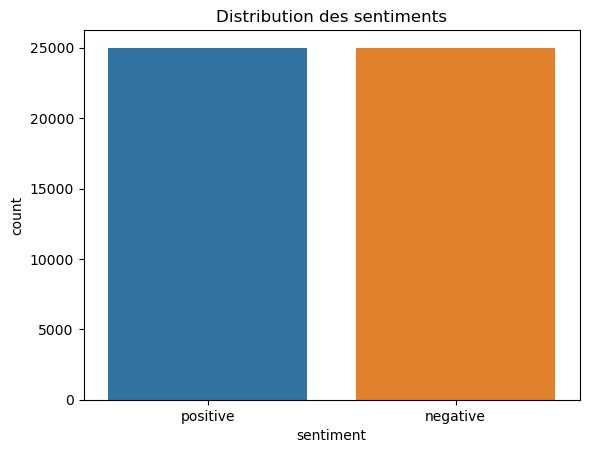

4ème review :
Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.


In [7]:
movie_reviews = pd.read_csv('IMDB Dataset.csv')

print('la dimension de imdb_df  :' , movie_reviews.shape)

print("Les valeurs nulls  :", movie_reviews.isnull().values.any())


print(movie_reviews.head())

sns.countplot(x='sentiment', data=movie_reviews)
plt.title('Distribution des sentiments')
plt.show()

print("4ème review :")
print(movie_reviews['review'].iloc[3])

# **Data processing**

**=>Les reiew contiennent des symboles commele <></> , des ponctuations et des nombres  donc on doit faire une data cleaning pour ameliorer la qualite de notre data donc les resultats de notre molele**

In [8]:
def preprocess_text(sen):
 # Removing html tags
 sentence = remove_tags(sen)
 # Remove punctuations and numbers
 sentence = re.sub('[^a-zA-Z]', ' ', sentence)
 # Single character removal
 sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
 # Removing multiple spaces
 sentence = re.sub(r'\s+', ' ', sentence)
 return sentence
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
 return TAG_RE.sub('', text)

### Fonction de prétraitement de texte

Ce code Python définit une fonction `preprocess_text` utilisée pour le prétraitement du texte. Voici une explication détaillée de chaque étape :

1. **Suppression des balises HTML** :
   La fonction `preprocess_text` commence par appeler une fonction `remove_tags` pour supprimer toutes les balises HTML du texte.

2. **Nettoyage du texte avec des expressions régulières** :
   - `re.sub('[^a-zA-Z]', ' ', sentence)`: Cette ligne remplace tous les caractères qui ne sont pas des lettres (majuscules ou minuscules) par un espace.
   - `re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)`: Cette ligne supprime les caractères isolés entourés d'espaces.
   - `re.sub(r'\s+', ' ', sentence)`: Cette ligne supprime tous les espaces multiples et les remplace par un seul espace.

3. **Retour du texte prétraité** :
   Le texte prétraité est renvoyé à la fin de la fonction.

### Expression régulière pour supprimer les balises HTML

Une expression régulière `TAG_RE` est compilée avec `re.compile()` pour supprimer les balises HTML du texte. Cette expression régulière correspond à `<[^>]+>`, ce qui signifie qu'elle correspond à toute séquence de caractères qui commence par `<` et se termine par `>`, supprimant ainsi toutes les balises HTML du texte.

### Fonction pour supprimer les balises HTML

La fonction `remove_tags` prend une chaîne de texte en entrée et utilise l'expression régulière compilée `TAG_RE` pour supprimer toutes les balises HTML du texte en les remplaçant par une chaîne vide.

En résumé, ce code effectue un prétraitement du texte en supprimant les balises HTML et en appliquant diverses substitutions avec des expressions régulières pour nettoyer et normaliser les données textuelles.


In [9]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
 X.append(preprocess_text(sen))

In [20]:
len(X)

50000

In [21]:
print(X[3])

Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them 


In [10]:
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [23]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)
print(len(X_train[0]))

2175


# **Embedding Layer**

In [18]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [11]:
print(len(tokenizer.word_index)+1)

92547


In [12]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

92547


In [13]:
# print(len(X_train[0]))
print(X_train[0])

[   4    1  296  140 2854    2  405  614    1  263    5 3514  977    4
   25   37   11 1237  215   62    2   35    5   27  217   24  189 1430
    7 1068   15 4868   81    1  221   63  351   64   52   24    4 3547
   13    6   19  192    4  859 3430 1720   17   23    4  158  194  175
  106    9 1604  461   71  218    4  321    2 3431   31   20   47   68
 1844 4668   11    6 1365    8   16    5 3475 1990   14   59    1 2380
  460  518    2  170 2524 2698 1745    4  573    6   33    1 3750  198
  345 3812]


In [14]:
from numpy import array
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open("glove.6B.100d.txt", encoding="utf8")
for line in glove_file:
 records = line.split()
 word = records[0]
 vector_dimensions = asarray(records[1:],dtype='float32')
 embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [15]:
embeddings_dictionary['hello'].shape

(100,)

In [16]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
 embedding_vector = embeddings_dictionary.get(word)
 if embedding_vector is not None:
  embedding_matrix[index] = embedding_vector

In [17]:
embedding_matrix[100][0]

0.05695100128650665

## **Simple NN**

In [18]:
# Création du modèle séquentiel
modelsnn = Sequential()

# Ajout des couches au modèle
modelsnn.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))
modelsnn.add(Flatten())
modelsnn.add(Dense(units=1, activation='sigmoid'))

# Compilation du modèle
modelsnn.compile(loss=binary_crossentropy, optimizer='adam', metrics=['acc'])


start_time = time.time()

# Entraînement du modèle
history = modelsnn.fit(X_train, y_train,
          epochs=6,
          batch_size=128,
          verbose=1,
          validation_split=0.2)


end_time = time.time()
train_time = end_time - start_time
print("Training time for modelsnn : {:.2f} secondes".format(train_time))



Epoch 1/6


250/250 [==============================] - 1s 2ms/step - loss: 0.6076 - acc: 0.6678 - val_loss: 0.5437 - val_acc: 0.7220
Epoch 2/6
250/250 [==============================] - 0s 1ms/step - loss: 0.4983 - acc: 0.7581 - val_loss: 0.5281 - val_acc: 0.7374
Epoch 3/6
250/250 [==============================] - 0s 1ms/step - loss: 0.4678 - acc: 0.7768 - val_loss: 0.5296 - val_acc: 0.7381
Epoch 4/6
250/250 [==============================] - 0s 2ms/step - loss: 0.4386 - acc: 0.7947 - val_loss: 0.5431 - val_acc: 0.7335
Epoch 5/6
250/250 [==============================] - 0s 1ms/step - loss: 0.4223 - acc: 0.8049 - val_loss: 0.5714 - val_acc: 0.7246
Epoch 6/6
250/250 [==============================] - 0s 1ms/step - loss: 0.4112 - acc: 0.8132 - val_loss: 0.5309 - val_acc: 0.7474
Training time for modelsnn : 2.94 secondes


### Explication de la création de la couche d'embedding dans Keras

La ligne de code `Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False)` crée une couche d'embedding dans un modèle de réseau de neurones avec Keras. Voici une explication détaillée de chaque argument :

- `Embedding`: C'est la classe Keras pour créer une couche d'embedding.

- `vocab_size`: C'est la taille du vocabulaire, c'est-à-dire le nombre total de mots uniques dans votre ensemble de données. Cette valeur est utilisée pour déterminer la taille de la matrice d'embedding.

- `100`: C'est la dimension des embeddings. Chaque mot du vocabulaire sera représenté par un vecteur de 100 dimensions.

- `weights=[embedding_matrix]`: Cet argument spécifie les poids de la couche d'embedding. Dans ce cas, `embedding_matrix` contient les embeddings pré-entraînés chargés à partir de GloVe. Cela signifie que les embeddings de cette couche seront initialisés avec les embeddings GloVe et seront gelés (non modifiables) pendant l'entraînement.

- `input_length=maxlen`: C'est la longueur maximale des séquences d'entrée. Toutes les séquences plus longues seront tronquées et toutes les séquences plus courtes seront remplies de zéros pour correspondre à cette longueur maximale. `maxlen` est une variable que vous devez définir auparavant et qui représente la longueur maximale des séquences dans vos données.

- `trainable=False`: Cet argument indique si les embeddings de cette couche sont entraînables ou non. Dans ce cas, les embeddings sont fixés à ceux pré-entraînés à partir de GloVe et ne seront pas modifiés pendant l'entraînement du modèle.

En résumé, cette ligne de code crée une couche d'embedding dans le modèle, en utilisant les embeddings pré-entraînés de GloVe pour représenter les mots du vocabulaire. Ces embeddings sont gelés pendant l'entraînement, ce qui signifie qu'ils ne seront pas modifiés, et la longueur maximale des séquences d'entrée est spécifiée pour adapter les données d'entrée au format attendu par cette couche d'embedding.


In [19]:
score = modelsnn.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 0s 760us/step - loss: 0.5321 - acc: 0.7459
Test Loss: 0.5321275591850281
Test Accuracy: 0.7458999752998352


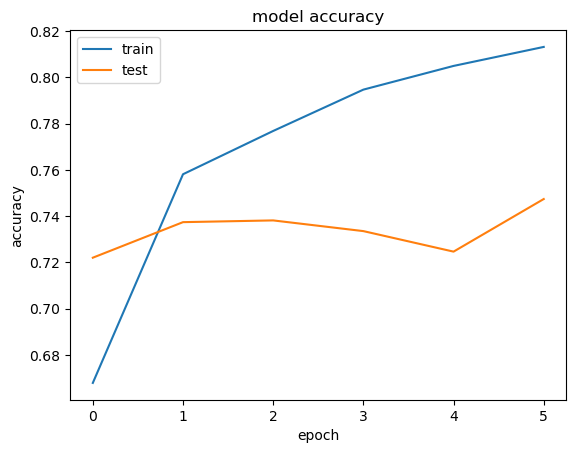

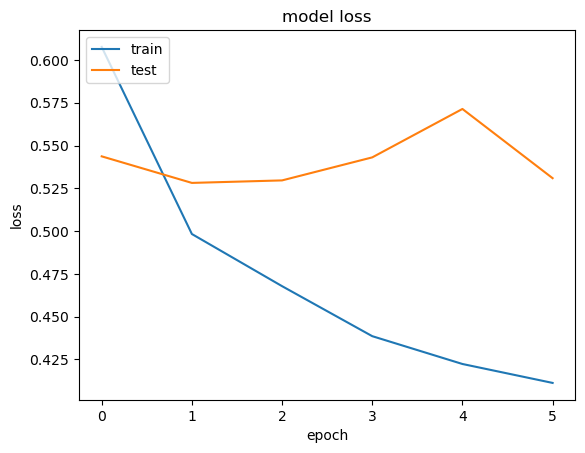

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## **CNN**

In [21]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from keras.losses import binary_crossentropy
from keras.optimizers import Adam

# Création du modèle séquentiel
modelcnn = Sequential()

# Ajout des couches au modèle
modelcnn.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen))

# Couche Convolutional 1D
modelcnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))

# Couche de pooling MaxPooling1D
modelcnn.add(MaxPooling1D())

# Couche Dense
modelcnn.add(Flatten())
modelcnn.add(Dense(units=1, activation='sigmoid'))

# Compilation du modèle
modelcnn.compile(loss=binary_crossentropy, optimizer='adam', metrics=['acc'])
start_time = time.time()

# Entraînement du modèle
history = modelcnn.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

end_time = time.time()
train_time = end_time - start_time
print("Training time for modelcnn : {:.2f} secondes".format(train_time))


Epoch 1/6
250/250 [==============================] - 18s 69ms/step - loss: 0.5323 - acc: 0.7172 - val_loss: 0.3741 - val_acc: 0.8345
Epoch 2/6
250/250 [==============================] - 17s 68ms/step - loss: 0.3278 - acc: 0.8599 - val_loss: 0.3493 - val_acc: 0.8510
Epoch 3/6
250/250 [==============================] - 17s 67ms/step - loss: 0.2598 - acc: 0.8942 - val_loss: 0.3363 - val_acc: 0.8569
Epoch 4/6
250/250 [==============================] - 17s 67ms/step - loss: 0.1973 - acc: 0.9235 - val_loss: 0.3747 - val_acc: 0.8462
Epoch 5/6
250/250 [==============================] - 17s 67ms/step - loss: 0.1339 - acc: 0.9551 - val_loss: 0.3877 - val_acc: 0.8446
Epoch 6/6
250/250 [==============================] - 17s 67ms/step - loss: 0.0754 - acc: 0.9819 - val_loss: 0.4226 - val_acc: 0.8479
Training time for modelcnn : 101.79 secondes


In [22]:
score = modelcnn.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.4063 - acc: 0.8503
Test Score: 0.406261682510376
Test Accuracy: 0.8503000140190125


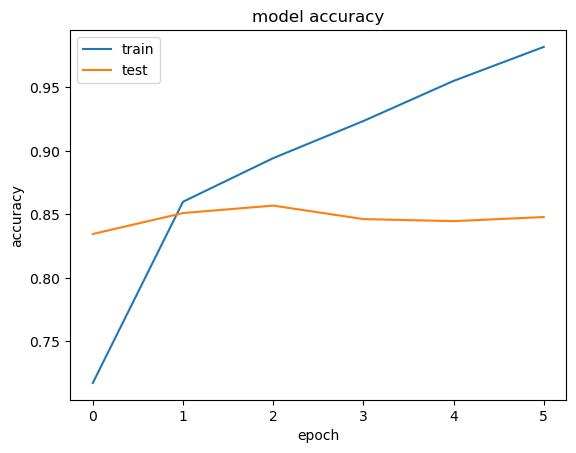

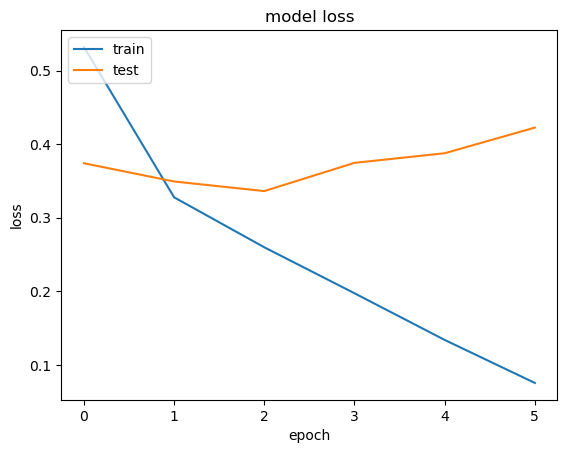

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## **LSTM**

In [24]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.losses import binary_crossentropy
from keras.optimizers import Adam

# Création du modèle séquentiel
modelrnn = Sequential()

# Ajout des couches au modèle
modelrnn.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen))

# Couche LSTM
modelrnn.add(LSTM(units=128))

# Couche Dense
modelrnn.add(Dense(units=1, activation='sigmoid'))

# Compilation du modèle
modelrnn.compile(loss=binary_crossentropy, optimizer='adam', metrics=['acc'])

start_time = time.time()

# Entraînement du modèle
history = modelrnn.fit(X_train,
                       y_train,
                       epochs=6,
                       batch_size=128,
                       verbose=1,
                       validation_split=0.2)

end_time = time.time()
train_time = end_time - start_time
print("Training time for modelrnn : {:.2f} secondes".format(train_time))

Epoch 1/6
250/250 [==============================] - 37s 138ms/step - loss: 0.5026 - acc: 0.7481 - val_loss: 0.3650 - val_acc: 0.8407
Epoch 2/6
250/250 [==============================] - 34s 136ms/step - loss: 0.3256 - acc: 0.8616 - val_loss: 0.3226 - val_acc: 0.8620
Epoch 3/6
250/250 [==============================] - 35s 139ms/step - loss: 0.2802 - acc: 0.8863 - val_loss: 0.3147 - val_acc: 0.8640
Epoch 4/6
250/250 [==============================] - 35s 138ms/step - loss: 0.2477 - acc: 0.9021 - val_loss: 0.3136 - val_acc: 0.8673
Epoch 5/6
250/250 [==============================] - 34s 138ms/step - loss: 0.2225 - acc: 0.9140 - val_loss: 0.3300 - val_acc: 0.8658
Epoch 6/6
250/250 [==============================] - 34s 136ms/step - loss: 0.1969 - acc: 0.9270 - val_loss: 0.3450 - val_acc: 0.8627
Training time for modelrnn : 208.24 secondes


In [25]:
score = modelrnn.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 4s 14ms/step - loss: 0.3243 - acc: 0.8670
Test Score: 0.3243227005004883
Test Accuracy: 0.8669999837875366


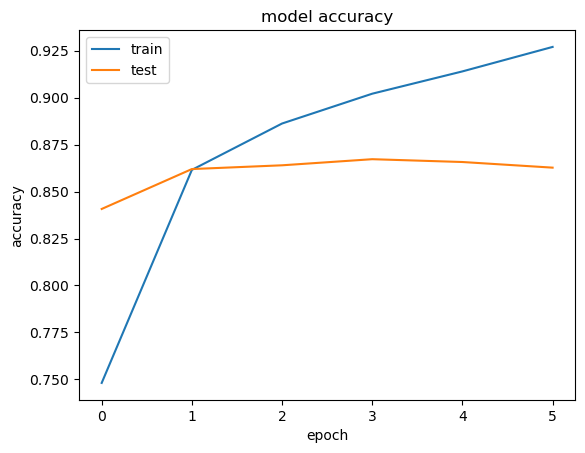

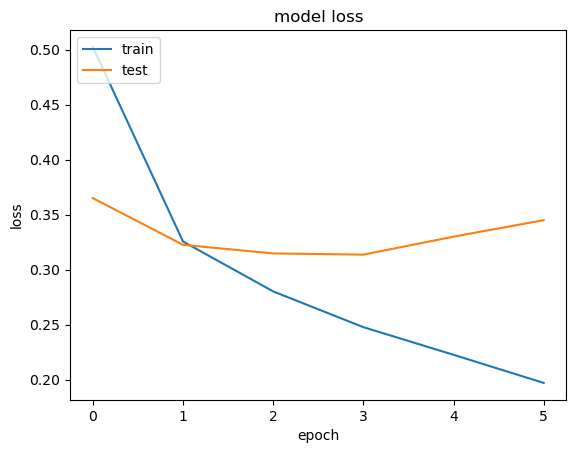

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## **GRU**

In [27]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense
from keras.losses import binary_crossentropy
from keras.optimizers import Adam

# Création du modèle séquentiel
modelgru = Sequential()

# Ajout des couches au modèle
modelgru.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen))

# Couche GRU
modelgru.add(GRU(units=128))

# Couche Dense
modelgru.add(Dense(units=1, activation='sigmoid'))

# Compilation du modèle
modelgru.compile(loss=binary_crossentropy, optimizer='adam', metrics=['acc'])

start_time = time.time()

# Entraînement du modèle
history = modelgru.fit(X_train,
                            y_train,
                            epochs=6,
                            batch_size=128,
                            verbose=1,
                            validation_split=0.2)

end_time = time.time()
train_time_gru = end_time - start_time
print("Training time for model_gru : {:.2f} secondes".format(train_time_gru))

Epoch 1/6
250/250 [==============================] - 33s 127ms/step - loss: 0.4874 - acc: 0.7464 - val_loss: 0.3338 - val_acc: 0.8559
Epoch 2/6
250/250 [==============================] - 33s 131ms/step - loss: 0.3043 - acc: 0.8716 - val_loss: 0.3156 - val_acc: 0.8627
Epoch 3/6
250/250 [==============================] - 32s 127ms/step - loss: 0.2605 - acc: 0.8934 - val_loss: 0.3076 - val_acc: 0.8680
Epoch 4/6
250/250 [==============================] - 31s 125ms/step - loss: 0.2241 - acc: 0.9118 - val_loss: 0.3183 - val_acc: 0.8662
Epoch 5/6
250/250 [==============================] - 31s 125ms/step - loss: 0.1972 - acc: 0.9237 - val_loss: 0.3549 - val_acc: 0.8654
Epoch 6/6
250/250 [==============================] - 32s 127ms/step - loss: 0.1670 - acc: 0.9387 - val_loss: 0.3674 - val_acc: 0.8648
Training time for model_gru : 192.34 secondes


In [28]:
score = modelgru.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.3469 - acc: 0.8681
Test Score: 0.34685108065605164
Test Accuracy: 0.8680999875068665


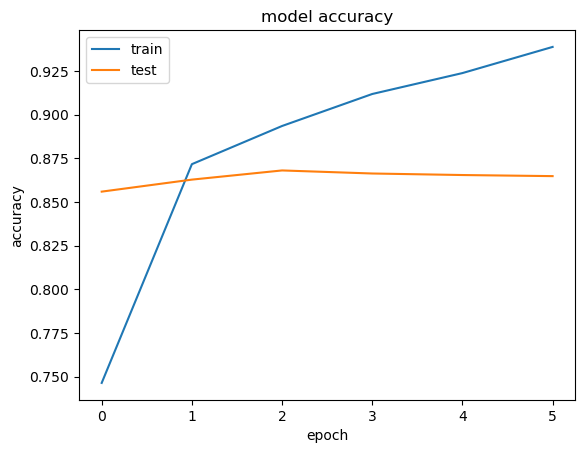

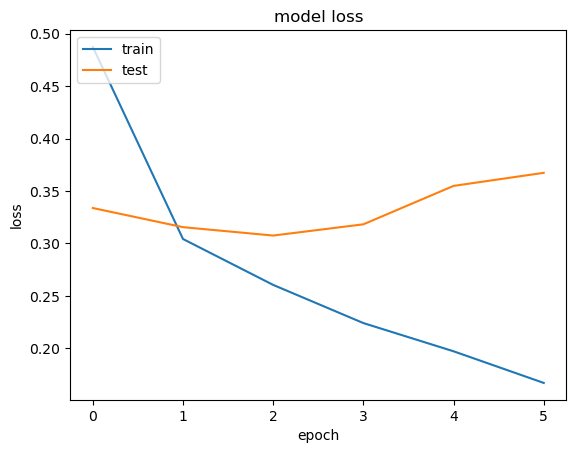

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## *Comparaison des models* : 

In [32]:
def compare_classifiers(cnn_model, lstm_model, dense_model, gru_model, X_test, y_test):
    
    # Simple nn
    dense_scores = dense_model.evaluate(X_test, y_test, verbose=0)
    print("Simple nn - Loss: {:.4f}, Accuracy: {:.2f}%".format(dense_scores[0], dense_scores[1] * 100))

    # CNN
    cnn_scores = cnn_model.evaluate(X_test, y_test, verbose=0)
    print("CNN - Loss: {:.4f}, Accuracy: {:.2f}%".format(cnn_scores[0], cnn_scores[1] * 100))

    # LSTM
    lstm_scores = lstm_model.evaluate(X_test, y_test, verbose=0)
    print("LSTM - Loss: {:.4f}, Accuracy: {:.2f}%".format(lstm_scores[0], lstm_scores[1] * 100))

    # GRU
    gru_scores = gru_model.evaluate(X_test, y_test, verbose=0)
    print("GRU - Loss: {:.4f}, Accuracy: {:.2f}%".format(gru_scores[0], gru_scores[1] * 100))

compare_classifiers(modelcnn, modelrnn, modelsnn, modelgru, X_test, y_test)

Simple nn - Loss: 0.5321, Accuracy: 74.59%
CNN - Loss: 0.4063, Accuracy: 85.03%
LSTM - Loss: 0.3243, Accuracy: 86.70%
GRU - Loss: 0.3469, Accuracy: 86.81%


## **Test**

In [33]:
def predict_sentiment(model, review, tokenizer, maxlen=100):
    review = preprocess_text(review)

    sequence = tokenizer.texts_to_sequences([review])

    padded_sequence = pad_sequences(sequence, maxlen=maxlen, padding='post')

    prediction = model.predict(padded_sequence)

    sentiment = "positif" if prediction >= 0.5 else "négatif"

    return sentiment

In [42]:
review_text = "I love you"

predicted_sentiment = predict_sentiment(modelsnn, review_text, tokenizer)
print("Le sentiment prédit pour la critique est :", predicted_sentiment)

1/1 [==============================] - 0s 26ms/step
Le sentiment prédit pour la critique est : positif


# **Partie Compte rendu** 

## **Embedding Layers**

In [23]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def create_and_fit_tokenizer(texts, max_words=5000):
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(texts)
    return tokenizer

def preprocess_sequences(tokenizer, sequences, maxlen):
    sequences = tokenizer.texts_to_sequences(sequences)
    padded_sequences = pad_sequences(sequences, padding='post', maxlen=maxlen)
    return padded_sequences

In [29]:
from numpy import zeros, asarray

def create_embedding_matrix(tokenizer, embeddings_file, embedding_dim=100):
    vocab_size = len(tokenizer.word_index) + 1
    embedding_matrix = zeros((vocab_size, embedding_dim))
    embeddings_dictionary = dict()

    with open(embeddings_file, 'r', encoding='utf8') as file:
        next(file)
        for line in file:
            records = line.split()
            word = records[0]
            try:
                vector_dimensions = asarray(records[1:], dtype='float32')
                embeddings_dictionary[word] = vector_dimensions
            except ValueError:
                continue


    for word, index in tokenizer.word_index.items():
        embedding_vector = embeddings_dictionary.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

    return embedding_matrix

## **Modeling**

In [37]:
import time
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Dense, TimeDistributed
from keras.losses import binary_crossentropy
from keras.optimizers import Adam

def train_and_evaluate_model(model_type, embedding_matrix, X_train, y_train, X_test, y_test, vocab_size, maxlen, save_path, results_file, embedding_name):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen))

    if model_type == 'lstm':
        model.add(LSTM(units=128))
    elif model_type == 'gru':
        model.add(GRU(units=128))
    elif model_type == 'crnn':
        model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(SimpleRNN(units=128, return_sequences=True))
        model.add(TimeDistributed(Dense(64)))
        model.add(Flatten())

    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss=binary_crossentropy, optimizer='adam', metrics=['acc'])

    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, validation_split=0.2)
    end_time = time.time()
    train_time = end_time - start_time
    print(f"Training time for {model_type} : {train_time:.2f} seconds")

    score = model.evaluate(X_test, y_test, verbose=1)
    print(f"Test Loss for {model_type}:", score[0])
    print(f"Test Accuracy for {model_type}:", score[1])

    # Save the model with the embedding name in the filename
    model_save_path = f"{save_path}/{model_type}_{embedding_name}_model.h5"
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")

    with open(results_file, 'a') as file:
        file.write(f"{model_type} with {embedding_name}: Loss = {score[0]}, Accuracy = {score[1]}\n")

    return model, history, score

## **Glove**

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [100]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
maxlen = 100
tokenizer = create_and_fit_tokenizer(X_train)
X_train = preprocess_sequences(tokenizer, X_train, maxlen)
X_test = preprocess_sequences(tokenizer, X_test, maxlen)

92547


In [101]:
embedding_matrix_glove = create_embedding_matrix(tokenizer, "glove.6B.100d.txt")

In [103]:
save_path = './models'
import os

if not os.path.exists(save_path):
    os.makedirs(save_path)

In [109]:
models = ['lstm', 'gru', 'crnn']
embedding_name = 'Glove'  # Specify the embedding method name here
save_path = './models'
results_file = './models/model_results.txt'
for model_type in models:
    print(f"------------------------------{model_type}-------------------------")
    train_and_evaluate_model(model_type, embedding_matrix_glove, X_train, y_train, X_test, y_test, vocab_size, maxlen, save_path, results_file, embedding_name)

------------------------------lstm-------------------------
Epoch 1/10
250/250 [==============================] - 35s 133ms/step - loss: 0.4862 - acc: 0.7581 - val_loss: 0.3694 - val_acc: 0.8350
Epoch 2/10
250/250 [==============================] - 33s 132ms/step - loss: 0.3349 - acc: 0.8568 - val_loss: 0.3419 - val_acc: 0.8511
Epoch 3/10
250/250 [==============================] - 33s 131ms/step - loss: 0.2874 - acc: 0.8822 - val_loss: 0.3469 - val_acc: 0.8636
Epoch 4/10
250/250 [==============================] - 33s 130ms/step - loss: 0.2533 - acc: 0.8976 - val_loss: 0.3199 - val_acc: 0.8629
Epoch 5/10
250/250 [==============================] - 33s 130ms/step - loss: 0.2352 - acc: 0.9076 - val_loss: 0.3255 - val_acc: 0.8659
Epoch 6/10
250/250 [==============================] - 33s 130ms/step - loss: 0.2095 - acc: 0.9180 - val_loss: 0.3748 - val_acc: 0.8645
Epoch 7/10
250/250 [==============================] - 33s 130ms/step - loss: 0.1870 - acc: 0.9285 - val_loss: 0.3881 - val_acc: 0.

## **Word2Vec :**

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [111]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
maxlen = 100
tokenizer = create_and_fit_tokenizer(X_train)
X_train = preprocess_sequences(tokenizer, X_train, maxlen)
X_test = preprocess_sequences(tokenizer, X_test, maxlen)

92547


In [112]:
embedding_matrix_word2vec = create_embedding_matrix(tokenizer, "enwiki_20180420_100d.txt")

In [113]:
models = ['lstm', 'gru', 'crnn']
embedding_name = 'Word2Vec'  # Specify the embedding method name here
save_path = './models'
results_file = './models/model_results.txt'
for model_type in models:
    print(f"------------------------------{model_type}-------------------------")
    train_and_evaluate_model(model_type, embedding_matrix_word2vec, X_train, y_train, X_test, y_test, vocab_size, maxlen, save_path, results_file, embedding_name)

------------------------------lstm-------------------------
Epoch 1/10
250/250 [==============================] - 38s 144ms/step - loss: 0.5190 - acc: 0.7418 - val_loss: 0.4143 - val_acc: 0.8075
Epoch 2/10
250/250 [==============================] - 36s 142ms/step - loss: 0.3448 - acc: 0.8519 - val_loss: 0.3280 - val_acc: 0.8562
Epoch 3/10
250/250 [==============================] - 36s 143ms/step - loss: 0.2887 - acc: 0.8819 - val_loss: 0.3202 - val_acc: 0.8656
Epoch 4/10
250/250 [==============================] - 36s 143ms/step - loss: 0.2591 - acc: 0.8945 - val_loss: 0.3208 - val_acc: 0.8655
Epoch 5/10
250/250 [==============================] - 36s 142ms/step - loss: 0.2342 - acc: 0.9056 - val_loss: 0.3243 - val_acc: 0.8641
Epoch 6/10
250/250 [==============================] - 36s 142ms/step - loss: 0.2075 - acc: 0.9194 - val_loss: 0.3392 - val_acc: 0.8660
Epoch 7/10
250/250 [==============================] - 36s 143ms/step - loss: 0.1789 - acc: 0.9326 - val_loss: 0.3882 - val_acc: 0.

## **Fasttext** :

In [39]:
pip install gensim

  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/2d/30/074bac7a25866a2807c1005c7852c0139ac22ba837871fc01f16df29b9dc/FuzzyTM-2.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/f0/fe/b899a3d9a18c9a44a35155c79a4c152cb85990ea38ce6ab7ed73e5caa1b9/pyFUME-0.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for simpful from https://files.pythonhosted.org/packages/9d/0e/aebc2fb0b0f481994179b2ee2b8e6bbf0894d971594688c018375e7076ea/simpful-2.12.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/59.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/59.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/59.6 

In [15]:
from gensim.models.fasttext import FastText as FT_gensim
from gensim.models.fasttext import load_facebook_vectors

fasttext_model = load_facebook_vectors("C:\\Users\\HAYKEL BARGUGUI\\RNN\\cc.en.300.bin")

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [26]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [27]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def create_and_fit_tokenizer(texts, max_words=5000):
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(texts)
    return tokenizer

def preprocess_sequences(tokenizer, sequences, maxlen):
    sequences = tokenizer.texts_to_sequences(sequences)
    padded_sequences = pad_sequences(sequences, padding='post', maxlen=maxlen)
    return padded_sequences

In [28]:
def create_embedding_matrix(word_index, fasttext_model):
    embedding_dim = fasttext_model.vector_size
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for word, index in word_index.items():
        if word in fasttext_model.key_to_index:  # Ensure the word is in FastText model
            embedding_matrix[index] = fasttext_model[word]
    return embedding_matrix

In [31]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
maxlen = 100
tokenizer = create_and_fit_tokenizer(X_train)
X_train = preprocess_sequences(tokenizer, X_train, maxlen)
X_test = preprocess_sequences(tokenizer, X_test, maxlen)

92547


In [32]:
embedding_matrix_fasttext = create_embedding_matrix(tokenizer.word_index, fasttext_model)
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = fasttext_model.vector_size

In [33]:
import time
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Dense, TimeDistributed
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from keras import backend as K

def train_and_evaluate_modelfasttext(model_type, embedding_matrix, X_train, y_train, X_test, y_test, vocab_size, maxlen, save_path, results_file, embedding_name):
    embedding_dim = embedding_matrix.shape[1]
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=False))

    if model_type == 'lstm':
        model.add(LSTM(units=128))
    elif model_type == 'gru':
        model.add(GRU(units=128))
    elif model_type == 'crnn':
        model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(SimpleRNN(units=128, return_sequences=True))
        model.add(TimeDistributed(Dense(64)))
        model.add(Flatten())

    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss=binary_crossentropy, optimizer='adam', metrics=['acc'])

    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, validation_split=0.2)
    end_time = time.time()
    train_time = end_time - start_time
    print(f"Training time for {model_type} : {train_time:.2f} seconds")

    score = model.evaluate(X_test, y_test, verbose=1)
    print(f"Test Loss for {model_type}:", score[0])
    print(f"Test Accuracy for {model_type}:", score[1])

    # Save the model with the embedding name in the filename
    model_save_path = f"{save_path}/{model_type}_{embedding_name}_model"
    try:
        model.save(model_save_path, save_format='tf')
        print(f"Model saved to {model_save_path}")
    except Exception as e:
        print(f"Failed to save model due to: {e}")

    # Write evaluation results to the file
    with open(results_file, 'a') as file:
        file.write(f"{model_type} with {embedding_name}: Loss = {score[0]}, Accuracy = {score[1]}\n")

    K.clear_session()  # Clear session to prevent resource exhaustion

    return model, history, score


In [34]:
models = ['lstm', 'gru', 'crnn']
embedding_name = 'FastText'
save_path = './models'
results_file = 'models/models_results.txt'

for model_type in models:
    print(f"----------------------------------------------------{model_type}-----------------------------------------------------")
    train_and_evaluate_modelfasttext(
        model_type=model_type,
        embedding_matrix=embedding_matrix_fasttext,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        vocab_size=vocab_size,
        maxlen=maxlen,
        save_path=save_path,
        results_file=results_file,
        embedding_name=embedding_name
    )

----------------------------------------------------lstm-----------------------------------------------------


Epoch 1/10


250/250 [==============================] - 42s 152ms/step - loss: 0.5209 - acc: 0.7365 - val_loss: 0.4700 - val_acc: 0.7785
Epoch 2/10
250/250 [==============================] - 36s 143ms/step - loss: 0.4224 - acc: 0.8071 - val_loss: 0.4336 - val_acc: 0.8012
Epoch 3/10
250/250 [==============================] - 34s 135ms/step - loss: 0.3973 - acc: 0.8203 - val_loss: 0.3766 - val_acc: 0.8296
Epoch 4/10
250/250 [==============================] - 36s 144ms/step - loss: 0.3785 - acc: 0.8314 - val_loss: 0.3720 - val_acc: 0.8371
Epoch 5/10
250/250 [==============================] - 37s 147ms/step - loss: 0.3538 - acc: 0.8442 - val_loss: 0.3706 - val_acc: 0.8284
Epoch 6/10
250/250 [==============================] - 36s 144ms/step - loss: 0.3388 - acc: 0.8512 - val_loss: 0.3493 - val_acc: 0.8480
Epoch 7/10
250/250 [==============================] - 35s 139ms/step - loss:

INFO:tensorflow:Assets written to: ./models/lstm_FastText_model\assets


Model saved to ./models/lstm_FastText_model
----------------------------------------------------gru-----------------------------------------------------
Epoch 1/10
250/250 [==============================] - 37s 140ms/step - loss: 0.5179 - acc: 0.7347 - val_loss: 0.4396 - val_acc: 0.8062
Epoch 2/10
250/250 [==============================] - 34s 135ms/step - loss: 0.4053 - acc: 0.8159 - val_loss: 0.4097 - val_acc: 0.8108
Epoch 3/10
250/250 [==============================] - 34s 137ms/step - loss: 0.3714 - acc: 0.8342 - val_loss: 0.3592 - val_acc: 0.8430
Epoch 4/10
250/250 [==============================] - 35s 139ms/step - loss: 0.3517 - acc: 0.8440 - val_loss: 0.3490 - val_acc: 0.8481
Epoch 5/10
250/250 [==============================] - 35s 139ms/step - loss: 0.3362 - acc: 0.8514 - val_loss: 0.3399 - val_acc: 0.8516
Epoch 6/10
250/250 [==============================] - 34s 137ms/step - loss: 0.3238 - acc: 0.8587 - val_loss: 0.3436 - val_acc: 0.8511
Epoch 7/10
250/250 [=================

INFO:tensorflow:Assets written to: ./models/gru_FastText_model\assets


Model saved to ./models/gru_FastText_model
----------------------------------------------------crnn-----------------------------------------------------



Epoch 1/10
250/250 [==============================] - 17s 61ms/step - loss: 0.5296 - acc: 0.7150 - val_loss: 0.4135 - val_acc: 0.8146
Epoch 2/10
250/250 [==============================] - 15s 59ms/step - loss: 0.3950 - acc: 0.8232 - val_loss: 0.3825 - val_acc: 0.8309
Epoch 3/10
250/250 [==============================] - 15s 59ms/step - loss: 0.3408 - acc: 0.8500 - val_loss: 0.4842 - val_acc: 0.7804
Epoch 4/10
250/250 [==============================] - 15s 59ms/step - loss: 0.2891 - acc: 0.8775 - val_loss: 0.3897 - val_acc: 0.8324
Epoch 5/10
250/250 [==============================] - 14s 57ms/step - loss: 0.2306 - acc: 0.9060 - val_loss: 0.4030 - val_acc: 0.8334
Epoch 6/10
250/250 [==============================] - 15s 58ms/step - loss: 0.1689 - acc: 0.9325 - val_loss: 0.5345 - val_acc: 0.8108
Epoch 7/10
250/250 [==============================] - 14s 58ms/step - loss: 0.1207 - acc: 0.9532 - val_loss: 0.5741 - val_acc: 0.8188
Epoch 8/10
250/250 [==============================] - 15s 58ms

INFO:tensorflow:Assets written to: ./models/crnn_FastText_model\assets


Model saved to ./models/crnn_FastText_model


## **TF-IDF**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)  

X_train = vectorizer.fit_transform(X_train).toarray()

X_test = vectorizer.transform(X_test).toarray()

vocab_size = X_train.shape[1]

In [14]:
print(X_train.shape[1])

10000


In [32]:
def train_and_evaluate_model(model_type, X_train, y_train, X_test, y_test, save_path, results_file):
    model = Sequential()
    
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Reshape((128, 1)))  
    if model_type == 'lstm':
        model.add(LSTM(units=128))
    elif model_type == 'gru':
        model.add(GRU(units=128))
    elif model_type == 'crnn':
        model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
        model.add(SimpleRNN(units=128, return_sequences=True))  
        model.add(GlobalMaxPooling1D())  
        model.add(Dense(64, activation='relu'))  

    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=binary_crossentropy, optimizer=Adam(), metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, validation_split=0.2)
    end_time = time.time()
    train_time = end_time - start_time
    print(f"Training time for {model_type}: {train_time:.2f} seconds")

    score = model.evaluate(X_test, y_test, verbose=1)
    print(f"Test Loss for {model_type}: {score[0]}")
    print(f"Test Accuracy for {model_type}: {score[1]}")

    model_save_path = f"{save_path}/{model_type}_tfidf_model.h5"
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")

    with open(results_file, 'a') as file:
        file.write(f"{model_type} with TF-IDF: Loss = {score[0]}, Accuracy = {score[1]}\n")

    return model, history, score


In [34]:
save_path = './models'
results_file = './models/model_results.txt'

models = ['lstm','gru','crnn']
for model_type in models:
    print(f"----------------------------------------------------{model_type}-----------------------------------------------------")
    model, history, score = train_and_evaluate_model(
        model_type=model_type, 
        X_train=X_train, 
        y_train=y_train, 
        X_test=X_test, 
        y_test=y_test, 
        save_path=save_path, 
        results_file=results_file)

------------------------------lstm-------------------------
Epoch 1/10
250/250 [==============================] - 30s 111ms/step - loss: 0.4314 - accuracy: 0.7728 - val_loss: 0.2861 - val_accuracy: 0.8945
Epoch 2/10
250/250 [==============================] - 26s 106ms/step - loss: 0.2148 - accuracy: 0.9231 - val_loss: 0.2759 - val_accuracy: 0.8866
Epoch 3/10
250/250 [==============================] - 26s 106ms/step - loss: 0.1527 - accuracy: 0.9478 - val_loss: 0.2872 - val_accuracy: 0.8871
Epoch 4/10
250/250 [==============================] - 27s 109ms/step - loss: 0.1009 - accuracy: 0.9683 - val_loss: 0.3427 - val_accuracy: 0.8813
Epoch 5/10
250/250 [==============================] - 26s 104ms/step - loss: 0.0664 - accuracy: 0.9787 - val_loss: 0.5116 - val_accuracy: 0.8810
Epoch 6/10
250/250 [==============================] - 27s 107ms/step - loss: 0.0518 - accuracy: 0.9845 - val_loss: 0.5209 - val_accuracy: 0.8748
Epoch 7/10
250/250 [==============================] - 27s 106ms/step -